In [3]:
%pylab inline
import pynbody

Populating the interactive namespace from numpy and matplotlib


In [112]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
s=pynbody.load(path+'snapshot_050')

In [113]:
gas = s.gas

In [9]:
xbox=403.8960 
ybox=459.8882
zbox=440.9021 
xc=408.205481 - xbox + 250 
yc=457.777839 - ybox + 250   
zc=441.538681 - zbox + 250

In [14]:
gas.loadable_keys()

['idgn',
 'iord',
 'mass',
 'pos',
 'idch',
 'u',
 'abvc',
 'sfr',
 'nh',
 'rho',
 'smooth',
 'vel',
 'ne']

In [52]:
pgs = gas['pos']
xne = gas['ne']
u   = gas['u']
rho = gas['rho']

In [97]:
r0 = 20
cut0, = np.where( (abs(pgs[:,0]-xc)<r0) & (abs(pgs[:,1]-yc)<r0) & (abs(pgs[:,2]-zc)<r0)   )

In [98]:
xh=0.76
yhe=(1.0-xh)/(4.0*xh)
mu = (1.0-yhe)/(1+yhe+xne)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10
te=(5./3.-1.)*u*vv*mu*mp/kcgs

In [99]:
temp = np.log10(te[cut0])
dens = np.log10(rho[cut0])

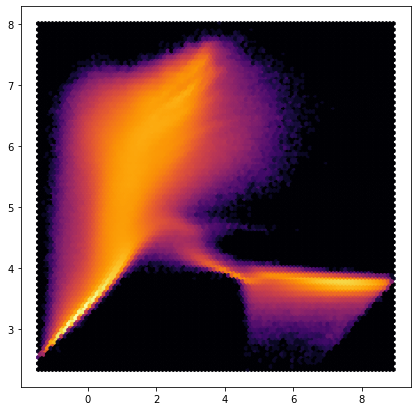

In [100]:
plt.figure(figsize=(7,7))
plt.hexbin(dens,temp,bins='log',cmap='inferno')

Ahora voy a seleccionar de ese diagrama de fases, diferentes regiones y voy a ver como cada region traza el perfil del void

In [101]:
temp1 = te[cut0]
rho1 = rho[cut0]
pgs1 = pgs[cut0]

In [102]:
limT=4.5
limRHO=2
secc1, = np.where((temp1<10**limT) & (rho1<limRHO))
secc2, = np.where((temp1<10**limT) & (rho1>limRHO))
secc3, = np.where((temp1>10**limT) & (rho1<limRHO))
secc4, = np.where((temp1>10**limT) & (rho1>limRHO))

In [103]:
len(secc3)

178966

In [104]:
bines=20
abin=np.log10(r0)/bines
p1=np.zeros(bines)
p2=np.zeros(bines)
p3=np.zeros(bines)
p4=np.zeros(bines)
for i in range(len(pgs1)):
    d = np.log10(np.sqrt((pgs1[i,0]-xc)**2+(pgs1[i,1]-yc)**2+(pgs1[i,2]-zc)**2))
    if ((temp1[i]<10**limT) & (rho1[i]<limRHO) & (d<np.log10(r0))):
        nbin=int(d/abin)
        p1[nbin]=p1[nbin]+1
    if((temp1[i]<10**limT) & (rho1[i]>limRHO)& (d<np.log10(r0))):
        nbin=int(d/abin)
        p2[nbin]=p2[nbin]+1
    if ((temp1[i]>10**limT) & (rho1[i]<limRHO)& (d<np.log10(r0))):
        nbin=int(d/abin)
        p3[nbin]=p3[nbin]+1
    if ((temp1[i]>10**limT) & (rho1[i]>limRHO)& (d<np.log10(r0))):
        nbin=int(d/abin)
        p4[nbin]=p4[nbin]+1

In [105]:
radio = np.zeros(bines)
vol   = np.zeros(bines) 
for i in range(bines):
    radio[i] = 10**(i*abin+abin/2)
    vol[i]   = (radio[i]**3)*4.*np.pi/3.

In [106]:
print('difuso',np.sum(p1))
print('condensado',np.sum(p2))
print('WHIM',np.sum(p3))
print('hot',np.sum(p4))

difuso 779707.0
condensado 1541597.0
WHIM 122938.0
hot 4194850.0


Text(0.5, 0, 'radio')

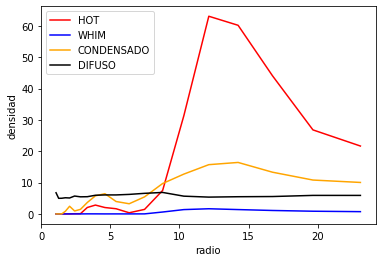

In [111]:
plt.plot(radio,p4/vol,color='red',label='HOT')
plt.plot(radio,p3/vol,color='blue',label='WHIM')
plt.plot(radio,p2/vol,color='orange',label='CONDENSADO')
plt.plot(radio,p1/vol,color='black',label='DIFUSO')
plt.legend()

plt.ylabel('densidad')
plt.xlabel('radio')

#plt.savefig(fname='/home/arodriguez/tesis/perfiles/fases_s.png',format='png')

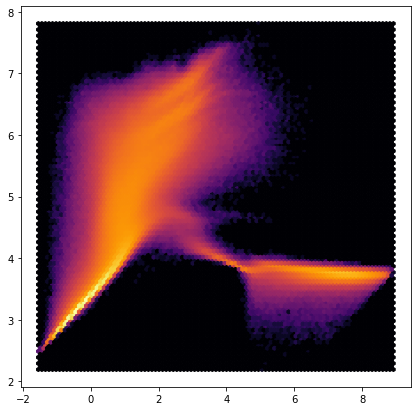

In [118]:
path='/mnt/is2/dpaz/ITV/R1198/out/'
s=pynbody.load(path+'snapshot_050')
gas = s.gas
pgs = gas['pos']
xne = gas['ne']
u   = gas['u']
rho = gas['rho']
cut0, = np.where( (abs(pgs[:,0]-xc)<r0) & (abs(pgs[:,1]-yc)<r0) & (abs(pgs[:,2]-zc)<r0)   )
xh=0.76
yhe=(1.0-xh)/(4.0*xh)
mu = (1.0-yhe)/(1+yhe+xne)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10
te=(5./3.-1.)*u*vv*mu*mp/kcgs
temp = np.log10(te[cut0])
dens = np.log10(rho[cut0])
plt.figure(figsize=(7,7))
plt.hexbin(dens,temp,bins='log',cmap='inferno')

In [119]:
temp1 = te[cut0]
rho1 = rho[cut0]
pgs1 = pgs[cut0]

bines=20
abin=np.log10(r0)/bines
p1=np.zeros(bines)
p2=np.zeros(bines)
p3=np.zeros(bines)
p4=np.zeros(bines)
for i in range(len(pgs1)):
    d = np.log10(np.sqrt((pgs1[i,0]-xc)**2+(pgs1[i,1]-yc)**2+(pgs1[i,2]-zc)**2))
    if ((temp1[i]<10**limT) & (rho1[i]<limRHO) & (d<np.log10(r0))):
        nbin=int(d/abin)
        p1[nbin]=p1[nbin]+1
    if((temp1[i]<10**limT) & (rho1[i]>limRHO)& (d<np.log10(r0))):
        nbin=int(d/abin)
        p2[nbin]=p2[nbin]+1
    if ((temp1[i]>10**limT) & (rho1[i]<limRHO)& (d<np.log10(r0))):
        nbin=int(d/abin)
        p3[nbin]=p3[nbin]+1
    if ((temp1[i]>10**limT) & (rho1[i]>limRHO)& (d<np.log10(r0))):
        nbin=int(d/abin)
        p4[nbin]=p4[nbin]+1

KeyboardInterrupt: 

In [ ]:
radio = np.zeros(bines)
vol   = np.zeros(bines) 
for i in range(bines):
    radio[i] = 10**(i*abin+abin/2)
    vol[i]   = (radio[i]**3)*4.*np.pi/3.


In [ ]:
plt.plot(radio,p4/vol,color='red',label='HOT')
plt.plot(radio,p3/vol,color='blue',label='WHIM')
plt.plot(radio,p2/vol,color='orange',label='CONDENSADO')
plt.plot(radio,p1/vol,color='black',label='DIFUSO')
plt.legend()

plt.ylabel('densidad')
plt.xlabel('radio')